# CPAS Exploration 

In [147]:
# Connecting to CPAS with cx_Oracle
# cx_Oracle is a Python extension module that enables access to Oracle Database
import cx_Oracle
import sqlalchemy
import os
import urllib
import json
import pandas as pd

In [148]:
USERNAME = os.environ.get('CPAS_USERNAME')
PASSWORD = os.environ.get('CPAS_PASSWORD')
HOSTNAME = '10.32.196.224'
PORT = '1332'
SERVICE_NAME = 'visispd1.lacity.org'

dsn = cx_Oracle.makedsn(HOSTNAME, PORT, service_name=SERVICE_NAME)
connection = cx_Oracle.connect(user=USERNAME, password=PASSWORD, dsn=dsn)

In [149]:
engine = sqlalchemy.create_engine(
f"oracle+cx_oracle://{USERNAME}:{PASSWORD}@{HOSTNAME}:{PORT}/"
f"?service_name={SERVICE_NAME}"
)

# Accessing Grant Applications

In [151]:
def get_grnt_app(year):
    USER_APP = f"GRNT{year}"
    yr_app = year
    return pd.read_sql(
        f"""SELECT * FROM
                (SELECT
                apl.grnt_aplctn_id,
                apl.prjct_ttl,
                apl.fnd_yr,
                (SELECT
                        field_value
                    FROM
                        {USER_APP}.grnt_l_stat,
                        {USER_APP}.grnt_stat
                    WHERE
                        grnt_stat.grnt_l_stat = grnt_l_stat.field_id
                        AND apl.grnt_aplctn_id = grnt_stat.grnt_aplctn_id
                 ) AS aplctn_status,

                (SELECT
                        field_value
                    FROM
                        grnt.grnt_l_dept,
                        {USER_APP}.grnt_cntct
                    WHERE
                        grnt_cntct.grnt_l_dept = grnt_l_dept.field_id
                        AND cty_dept_yn = 1
                        AND apl.grnt_city_dept_cntct_id = grnt_cntct_id
                ) AS dept_nm
            FROM
                {USER_APP}.grnt_aplctn apl
            WHERE
                1 = 1
        )
    WHERE
        1 = 1
        AND fnd_yr = {yr_app}
    ORDER BY
        prjct_ttl,
        dept_nm,
        aplctn_status""", engine)


In [152]:
get_grnt_app(46).head(5)

,grnt_aplctn_id,prjct_ttl,fnd_yr,aplctn_status,dept_nm
0,509455,AFFORDABLE HOUSING MANAGED PIPELINE AND PROGRA...,46,SUBMITTED,HOUSING AND COMMUNITY INVESTMENT DEPARTMENT
1,506109,AGING DEPARTMENT,46,SUBMITTED,"AGING, DEPARTMENT OF"
2,506171,AGING SERVICES DELIVERY SYSTEM,46,SUBMITTED,"AGING, DEPARTMENT OF"
3,510903,ALLEGHENY PARK,46,SUBMITTED,"RECREATION AND PARKS, DEPARTMENT OF"
4,510481,ARMINTA ST. PEDESTRIAN IMPROVEMENTS,46,SUBMITTED,"PUBLIC WORKS: STREET SERVICES, BUREAU OF"


## Creating a csv file for grant years 33-46

In [153]:
import csv
with open('df_app.csv',mode = 'w') as f:
    f = csv.writer(f)
    for year in range(37,47):
        df_app = pd.DataFrame(get_grnt_app(year))
        df_app.to_csv('df_app.csv', mode = 'a', header = True, index = False)

## List of departments submitting applications between grant years 33-46

In [154]:
import pandas as pd
import itertools
from collections import Counter
adn = df_app.dept_nm.unique()
print(pd.value_counts(adn))
list(i for i,_ in itertools.groupby(sorted(adn)))


ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT    1
AGING, DEPARTMENT OF                             1
BUILDING & SAFETY, DEPARTMENT OF                 1
HOUSING AUTHORITY OF THE CITY OF LOS ANGELES     1
PUBLIC WORKS: STREET LIGHTING, BUREAU OF         1
PUBLIC WORKS: SANITATION, BUREAU OF              1
PUBLIC WORKS: STREET SERVICES, BUREAU OF         1
CITY ATTORNEY                                    1
RECREATION AND PARKS, DEPARTMENT OF              1
PUBLIC WORKS: ENGINEERING, BUREAU OF             1
HOUSING AND COMMUNITY INVESTMENT DEPARTMENT      1
dtype: int64


['AGING, DEPARTMENT OF',
 'BUILDING & SAFETY, DEPARTMENT OF',
 'CITY ATTORNEY',
 'ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT',
 'HOUSING AND COMMUNITY INVESTMENT DEPARTMENT',
 'HOUSING AUTHORITY OF THE CITY OF LOS ANGELES',
 'PUBLIC WORKS: ENGINEERING, BUREAU OF',
 'PUBLIC WORKS: SANITATION, BUREAU OF',
 'PUBLIC WORKS: STREET LIGHTING, BUREAU OF',
 'PUBLIC WORKS: STREET SERVICES, BUREAU OF',
 'RECREATION AND PARKS, DEPARTMENT OF']

## List of project titles

In [155]:
import pandas as pd
import itertools
pt = df_app.prjct_ttl.unique()
list(i for i,_ in itertools.groupby(sorted(pt)))

['AFFORDABLE HOUSING MANAGED PIPELINE AND PROGRAM DELIVERY',
 'AGING DEPARTMENT',
 'AGING SERVICES DELIVERY SYSTEM',
 'ALLEGHENY PARK',
 'ARMINTA ST. PEDESTRIAN IMPROVEMENTS',
 'ARMINTA ST. STREET LIGHTING PROJECT',
 'BCA PREVAILING WAGE LABOR COMPLIANCE SERVICE',
 'BIXBY PROJECT',
 'BRADLEY PLAZA GREEN ALLEY (LIGHTING)',
 'CARL ST. SIDEWALK GAP CLOSURES',
 'CATHOLIC CHARITIES',
 'CEDS COMMERCIAL DISTRICT REVITALIZATION PILOT PROGRAM',
 'CELES KING III POOL REPLACEMENT',
 'CENTRAL CITY NEIGHBORHOOD PARTNERS - NEW GENERATOR',
 "CHILDREN'S SAVINGS ACCOUNT (CSA)",
 'CITY ATTORNEY - CDBG PROGRAM ADMINISTRATION FOR HCIDLA',
 'CITY ATTORNEY RESIDENTIAL ENFORCEMENT (CARE)',
 'CITY ATTORNEY TASK FORCE FOR APARTMENT & RENTAL PROPERTIES (TARP)',
 'CITY PROPERTY PROJECT PLANNING AND FEASIBILITY',
 'CLINICA ROMERO TRANSFORMATION PROJECT',
 'CODE ENFORCEMENT (CITYWIDE PACE)',
 'CONTRERAS LEARNING COMPLEX SYNTHETIC TURF AND SLOPE REMEDIATION',
 'DE GARMO PARK BASKETBALL COURT AND FITNESS AREA',
 'DO

## Script to create json files for individual grant years

In [156]:
grnt41_app = pd.DataFrame(get_grnt_app(41))
grnt41_app.to_json('grnt41_app.json', orient = 'records')

## json files covering multiple grant years

In [157]:
def grnt_app(year):
    user_num = get_grnt_app(year)
    yr_app = year
    return f'grnt{user_num}_app = pd.DataFrame{yr_app}'
    for user_num in range(33,47):
        f"grnt{user_num}_app.to_json(r'grnt{user_num}_app.json', orient = 'records')"

In [158]:
grnt_app(42)

'grnt     grnt_aplctn_id                                          prjct_ttl  \\\n0            440147  1736 FAMILY CRISIS CENTER EMERGENCY YOUTH SHEL...   \n1            426633    6TH STREET VIADUCT MISSION & JESSE IMPROVEMENTS   \n2            429321        88TH AND VERMONT YOUTH AND COMMUNITY CENTER   \n3            431617                                      ACCELERATE LA   \n4            430963  AFFORDABLE HOUSING TRUST FUND AND PROGRAM DELI...   \n..              ...                                                ...   \n122          429877       WASHINGTON IRVING MIDDLE SCHOOL SOCCER FIELD   \n123          438933                         WESTERN & GAGE POCKET PARK   \n124          430103       WHITSETT SPORTS FIELD IMPROVEMENTS PHASE III   \n125          427687      WILKINSON MULTIPURPOSE SENIOR CENTER UPGRADES   \n126          427489               WILMINGTON TOWN SQUARE PARK PHASE II   \n\n     fnd_yr aplctn_status                                        dept_nm  \n0        42     

In [159]:
user_num = (grnt_app(43))   
f"grnt{user_num}_app = pd.DataFrame{user_num}"
f"grnt{user_num}_app.to_json(r'grnt{user_num}_app.json', orient = 'records')"

"grntgrnt     grnt_aplctn_id                                          prjct_ttl  \\\n0            467157        1736 FAMILY CRISIS CENTER PERMANENT HOUSING   \n1            455895  1736 FAMILY CRISIS CENTER WILMINGTON COMMUNITY...   \n2            447531        88TH AND VERMONT YOUTH AND COMMUNITY CENTER   \n3            452207  AFFORDABLE HOUSING TRUST FUND AND PROGRAM DELI...   \n4            446999                                   AGING DEPARTMENT   \n..              ...                                                ...   \n101          449545        VAN NUYS- ORION STREET LIGHTING IMPROVEMENT   \n102          455465                      VEDC RESTORE LA/GREAT STREETS   \n103          467575         VERA DAVIS MCCLENDON CENTER REHABILITATION   \n104          451141                          VISION THEATER RENOVATION   \n105          454045                                   WESTERN AVE APTS   \n\n     fnd_yr aplctn_status                                        dept_nm  \n0        43 

In [160]:
# shape of the dataframe
df_app_tot = pd.read_csv('../data/df_app.csv')
print(df_app_tot.shape, '\n')

# data type of each column
print(df_app_tot.dtypes, '\n')

# number of null values
print(df_app_tot.info())

(5251, 5) 

grnt_aplctn_id    object
prjct_ttl         object
fnd_yr            object
aplctn_status     object
dept_nm           object
dtype: object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5251 entries, 0 to 5250
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   grnt_aplctn_id  5251 non-null   object
 1   prjct_ttl       5251 non-null   object
 2   fnd_yr          5251 non-null   object
 3   aplctn_status   5251 non-null   object
 4   dept_nm         5251 non-null   object
dtypes: object(5)
memory usage: 205.2+ KB
None


In [161]:
# number of unique values of column dept
print(df_app_tot.dept_nm.nunique(),'\n')

# unique values of column dept
print(df_app_tot.dept_nm.unique())

36 

['COMMUNITY DEVELOPMENT DEPARTMENT' 'HOUSING DEPARTMENT'
 'AGING, DEPARTMENT OF' 'DISABILITY, DEPARTMENT ON'
 'RECREATION AND PARKS, DEPARTMENT OF'
 'PUBLIC WORKS: STREET SERVICES, BUREAU OF' 'MAYOR, OFFICE OF THE'
 'PUBLIC WORKS: BOARD OF PUBLIC WORKS' 'COMMUNITY REDEVELOPMENT AGENCY'
 'PUBLIC WORKS: ENGINEERING, BUREAU OF' 'GENERAL SERVICES, DEPARTMENT OF'
 'WATER AND POWER, DEPARTMENT OF' 'CITY ATTORNEY'
 'BUILDING & SAFETY, DEPARTMENT OF' 'CULTURAL AFFAIRS, DEPARTMENT OF'
 'TRANSPORTATION, DEPARTMENT OF (DOT)' 'COUNCIL STANDING COMMITTEES'
 'CITY ADMINISTRATIVE OFFICER' 'PUBLIC WORKS: SANITATION, BUREAU OF'
 'INFORMATION TECHNOLOGY AGENCY'
 'PUBLIC WORKS: STREET LIGHTING, BUREAU OF' 'POLICE DEPARTMENT' 'dept_nm'
 'NON-DEPARTMENTAL (GENERAL)' 'PLANNING, CITY'
 'HOUSING AND COMMUNITY INVESTMENT DEPARTMENT' 'COUNCIL DISTRICT #13'
 'ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT' 'COUNCIL DISTRICT #14'
 'COUNCIL DISTRICT #07' 'COUNCIL DISTRICT #12'
 'HOUSING AUTHORITY OF THE CITY O

# Accessing GRP Information

In [162]:
def get_grnt_grp(year):
    USER_grp = f"GRNT{year}"   
    return pd.read_sql(
        f"""SELECT DISTINCT
            {USER_grp}.grnt_gpr.yr,
            {USER_grp}.grnt_gpr.grnt_gpr_id,
            {USER_grp}.grnt_gpr.dept,
            {USER_grp}.grnt_gpr.pid,
            {USER_grp}.grnt_gpr.actv_nbr,
            {USER_grp}.grnt_gpr.proj_nm,
            {USER_grp}.grnt_gpr.actv_nm,
            {USER_grp}.grnt_gpr.proj_addr,
            {USER_grp}.grnt_gpr.proj_desc,
            {USER_grp}.grnt_gpr.natl_obj,
            {USER_grp}.grnt_gpr.hud_cd,
            {USER_grp}.grnt_hud_cd.grnt_hud_cd_id,
            {USER_grp}.grnt_hud_cd.ttl,
            {USER_grp}.grnt_hud_cd.regulation_cit,
            {USER_grp}.grnt_gpr.grnt_l_accmplsh,
            {USER_grp}.grnt_gpr.obj_cnt,
            {USER_grp}.grnt_gpr.otcm_cnt,
            {USER_grp}.grnt_gpr.accmplsh_actl_units,
            {USER_grp}.grnt_gpr.accmplsh_narrtv,
            {USER_grp}.grnt_gpr.fund_amt,
            {USER_grp}.grnt_gpr.drn_thru_amt,
            {USER_grp}.grnt_gpr.tot_accmplsh,
            {USER_grp}.grnt_gpr.tot_hsg,
            {USER_grp}.grnt_gpr.accmplsh_narrtv_updt,
            {USER_grp}.grnt_gpr.aprv_anlst_email,
            {USER_grp}.grnt_gpr.aprv_anlst_tel,
            {USER_grp}.grnt_gpr.aprv_anlst_sig_dt,
            {USER_grp}.grnt_gpr.aprv_supv_nm,
            {USER_grp}.grnt_gpr.aprv_supv_email,
            {USER_grp}.grnt_gpr.aprv_anlst_dept_nm,
            {USER_grp}.grnt_gpr.gpr_subm_dt,
            {USER_grp}.grnt_gpr.grnt_l_gpr_actv_stts,
            {USER_grp}.grnt_gpr.ent_in_idis_dt
        FROM
            {USER_grp}.grnt_gpr
            INNER JOIN {USER_grp}.grnt_hud_cd ON {USER_grp}.grnt_gpr.hud_cd = {USER_grp}.grnt_hud_cd.hud_cd
        WHERE
            {USER_grp}.grnt_gpr.yr > '2009'
        ORDER BY
            {USER_grp}.grnt_gpr.yr,
            {USER_grp}.grnt_gpr.proj_nm""", engine)

In [164]:
import csv
with open('df_grp.csv',mode = 'w') as f:
    f = csv.writer(f)
    for year in range(35,45):
        df_grp = pd.DataFrame(get_grnt_grp(year))
        df_grp.to_csv('df_grp.csv', mode = 'a', header = True, index = False)

In [165]:
# shape of the dataframe
df_grp_tot = pd.read_csv('df_grp.csv')
print(df_grp_tot.shape, '\n')

# data type of each column
print(df_grp_tot.dtypes, '\n')

# number of null values
print(df_grp_tot.info())

(2563, 33) 

yr                      object
grnt_gpr_id             object
dept                    object
pid                     object
actv_nbr                object
proj_nm                 object
actv_nm                 object
proj_addr               object
proj_desc               object
natl_obj                object
hud_cd                  object
grnt_hud_cd_id          object
ttl                     object
regulation_cit          object
grnt_l_accmplsh         object
obj_cnt                 object
otcm_cnt                object
accmplsh_actl_units     object
accmplsh_narrtv         object
fund_amt                object
drn_thru_amt            object
tot_accmplsh            object
tot_hsg                 object
accmplsh_narrtv_updt    object
aprv_anlst_email        object
aprv_anlst_tel          object
aprv_anlst_sig_dt       object
aprv_supv_nm            object
aprv_supv_email         object
aprv_anlst_dept_nm      object
gpr_subm_dt             object
grnt_l_gpr_actv_stts    ob

In [114]:
# number of unique values of column dept
print(df_grp_tot.dept.nunique(),'\n')

# unique values of column dept
print(df_grp_tot.dept.unique())

43 

['dept' 'DOD' 'AGING' 'PW/OCB' 'CDD/NDD' 'CDD/EDD' 'CDD/WDD' 'DWP'
 'PW/BOE' 'CITY ATTY' 'BLD & SFTY' 'CDD/PRE' 'CDD/ASD' 'CDD/HS' 'PW/BSL'
 'GRYD/MAYOR' 'CDD/YOM' 'REC & PKS' 'BLDG & SFTY' 'DOT' 'MAYOR/GRYD'
 'PW/BSS' 'CULT AFF' 'CAO' 'CITY ATT' 'CDD/OPS' 'Rec & PK' 'Rec & Pk'
 'CDD/HRA' 'Aging' 'City Atty' 'Mayor' 'HCIDLA' 'EWD' 'REC & PK' 'PW/BOSS'
 'MAYOR' 'PW/SAN' 'Cult Aff' 'LADOT' 'Bldg & Sfty' 'EWDD' 'Grnts' nan]


In [166]:
grnt44_grp = pd.DataFrame(get_grnt_grp(44))
grnt44_grp.to_json('grnt44_grp.json', orient = 'records')

In [167]:
def grnt_grp(year):
    user_num = get_grnt_grp(year)
    yr_grp = year
    return f'grnt{user_num}_grp = pd.DataFrame{yr_grp}'
    for user_num in range(33,46):
        f"grnt{user_num}_grp.to_json(r'grnt{user_num}_grp.json', orient = 'records')"

In [168]:
# grnt_grp(44)

In [169]:
grnt44_grp = pd.DataFrame(get_grnt_grp(44))
grnt44_grp.to_json('grnt_grp.json', orient = 'records')

## Accessing PEP Information

In [170]:
def get_grnt_pep(year):
    USER_pep = f"GRNT{year}"
    yr_pep = year
    return pd.read_sql(
        f"""SELECT
            {yr_pep} AS pgm_year,
            grnt_pep_id,
            pep_agcy_nm,
            pep_proj_nm,
            citywide_cncl_dist_yn,
            grnt_l_pep_stts,
            to_char(pep_vrftn_dt, 'mm/dd/yyyy') AS pep_vrftn_dt,
            to_char(pep_to_mgmt_dt, 'mm/dd/yyyy') AS pep_to_mgmt_dt,
            to_char(pep_send_out_dt, 'mm/dd/yyyy') AS pep_send_out_dt,
            grnt_l_send_out_mthd,
            to_char(cdbo_send_vrftn_dt, 'mm/dd/yyyy') AS cdbo_send_vrftn_dt,
            to_char(pep_rcv_dt, 'mm/dd/yyyy') AS pep_rcv_dt,
            pep_rcv_dt AS pep_rcv_dt_2,
            (
                SELECT
                    field_value
                FROM
                    {USER_pep}.grnt_l_pep_typ
                WHERE
                    field_id = gp.grnt_l_pep_typ
            ) AS grnt_l_pep_typ_value,
            (
                SELECT
                    prjct_ttl
                FROM
                    {USER_pep}.grnt_aplctn
                WHERE
                    grnt_aplctn_id = gp.grnt_aplctn_id
            ) AS prjct_ttl,
            cdbg_fnd_amt,
            (
                SELECT
                    proj_id
                FROM
                    {USER_pep}.grnt_prpsd_proj
                WHERE
                    grnt_aplctn_id = gp.grnt_aplctn_id
            ) AS proj_id,
            (
                SELECT
                    pep_note
                FROM
                    {USER_pep}.grnt_pep_note
                WHERE
                    grnt_l_pep_note_typ = 470
                    AND grnt_pep_id = gp.grnt_pep_id
            ) AS trackingcomment,
            (
                SELECT
                    pep_note
                FROM
                    {USER_pep}.grnt_pep_note
                WHERE
                    grnt_l_pep_note_typ = 485
                    AND grnt_pep_id = gp.grnt_pep_id
            ) AS pep_vrftn_comment,
            (
                SELECT
                    pep_note
                FROM
                    {USER_pep}.grnt_pep_note
                WHERE
                    grnt_l_pep_note_typ = 487
                    AND grnt_pep_id = gp.grnt_pep_id
            ) AS pep_to_mgmt_comment,
            (
                SELECT
                    pep_note
                FROM
                    grnt43.grnt_pep_note
                WHERE
                    grnt_l_pep_note_typ = 488
                    AND grnt_pep_id = gp.grnt_pep_id
            ) AS cdbo_send_vrftn_comment,
            (
                SELECT
                    field_value
                FROM
                    {USER_pep}.grnt_l_pep_stts
                WHERE
                    field_id = gp.grnt_l_pep_stts
            ) AS grnt_l_pep_stts_value,
            (
                SELECT
                    field_value
                FROM
                    {USER_pep}.grnt_l_send_out_mthd
                WHERE
                    field_id = gp.grnt_l_send_out_mthd
            ) AS grnt_l_send_out_mthd_value,
            (
                SELECT
                    ldp.field_value
                FROM
                    {USER_pep}.grnt_aplctn   apl,
                    {USER_pep}.grnt_cntct    cicon,
                    grnt.grnt_l_dept     ldp
                WHERE
                    apl.grnt_aplctn_id = gp.grnt_aplctn_id
                    AND cicon.cty_dept_yn = 1
                    AND apl.grnt_city_dept_cntct_id = cicon.grnt_cntct_id
                    AND cicon.grnt_l_dept = ldp.field_id
            ) AS department,
            grnt_l_rec_color,
            (
                SELECT
                    field_value
                FROM
                    {USER_pep}.grnt_l_rec_color
                WHERE
                    field_id = gp.grnt_l_rec_color
            ) AS grnt_l_rec_color_value,
            (
                SELECT
                    grnt_user.grnt_utility.value_list('
                                select 
                                    field_value 
                                from 
                                    {USER_pep}.GRNT_PEP_CNCL_DIST A,
                                    {USER_pep}.GRNT_L_CNCL_DIST B

                                where B.FIELD_ID=A.GRNT_L_CNCL_DIST
                                and
                                grnt_pep_id = '
                    || gp.grnt_pep_id)
                FROM
                    dual
            ) AS council_district,
            temp.status_date
        FROM
            {USER_pep}.grnt_pep gp,
            (
                SELECT
                    MAX(mod_dt) AS status_date,
                    pk_id
                FROM
                    {USER_pep}.grnt_hist
                WHERE
                    table_nm = 'GRNT_PEP'
                    AND pk_nm = 'GRNT_PEP_ID'
                    AND field_nm = 'GRNT_L_PEP_STTS'
                GROUP BY
                    pk_id
            ) temp
        WHERE
            gp.grnt_pep_id = temp.pk_id (+)
            AND grnt_pep_id IN (
                SELECT
                    grnt_pep_id
                FROM
                    {USER_pep}.grnt_pep
            )
        ORDER BY
            proj_id,
            pep_agcy_nm""", engine)

In [144]:
#get_grnt_pep(45) # script works for grnt38 - 45

In [171]:
import csv
import json
with open('df_pep.csv',mode = 'w') as f:
    f = csv.writer(f)
    for year in range(38,46):
        df_pep = pd.DataFrame(get_grnt_pep(year))
        df_pep.to_csv('df_pep.csv', mode = 'a', header =True, index = False)        

In [172]:
def grnt_pep(year):
    user_num = get_grnt_pep(year)
    yr_pep = year
    return f'grnt{user_num}_pep = pd.DataFrame{yr_pep}'
    for user_num in range(33,46):
        f"grnt{user_num}_pep.to_json(r'grnt{user_num}_pep.json', orient = 'records')"

In [173]:
grnt41_pep = pd.DataFrame(get_grnt_pep(41))
grnt41_pep.to_json('grnt41_pep.json', orient = 'records')

In [174]:
# shape of the dataframe
df_pep_tot = pd.read_csv('df_pep.csv')
print(df_pep_tot.shape, '\n')

# data type of each column
print(df_pep_tot.dtypes, '\n')

# number of null values
print(df_pep_tot.info())

(1268, 28) 

pgm_year                      object
grnt_pep_id                   object
pep_agcy_nm                   object
pep_proj_nm                   object
citywide_cncl_dist_yn         object
grnt_l_pep_stts               object
pep_vrftn_dt                  object
pep_to_mgmt_dt                object
pep_send_out_dt               object
grnt_l_send_out_mthd          object
cdbo_send_vrftn_dt            object
pep_rcv_dt                    object
pep_rcv_dt_2                  object
grnt_l_pep_typ_value          object
prjct_ttl                     object
cdbg_fnd_amt                  object
proj_id                       object
trackingcomment               object
pep_vrftn_comment             object
pep_to_mgmt_comment           object
cdbo_send_vrftn_comment       object
grnt_l_pep_stts_value         object
grnt_l_send_out_mthd_value    object
department                    object
grnt_l_rec_color              object
grnt_l_rec_color_value        object
council_district         

In [175]:
# number of unique values of column dept
print(df_pep_tot.department.nunique(),'\n')

# unique values of column dept
print(df_pep_tot.department.unique())

21 

['AGING, DEPARTMENT OF' 'DISABILITY, DEPARTMENT ON'
 'PUBLIC WORKS: BOARD OF PUBLIC WORKS' 'CITY ATTORNEY'
 'COMMUNITY DEVELOPMENT DEPARTMENT' 'HOUSING DEPARTMENT'
 'MAYOR, OFFICE OF THE' 'PUBLIC WORKS: STREET SERVICES, BUREAU OF'
 'BUILDING & SAFETY, DEPARTMENT OF' 'CULTURAL AFFAIRS, DEPARTMENT OF'
 'RECREATION AND PARKS, DEPARTMENT OF' 'department'
 'CITY ADMINISTRATIVE OFFICER' 'NON-DEPARTMENTAL (GENERAL)'
 'PUBLIC WORKS: STREET LIGHTING, BUREAU OF'
 'HOUSING AND COMMUNITY INVESTMENT DEPARTMENT'
 'ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT'
 'TRANSPORTATION, DEPARTMENT OF (DOT)'
 'PUBLIC WORKS: ENGINEERING, BUREAU OF' 'COUNCIL DISTRICT #14'
 'PUBLIC WORKS: SANITATION, BUREAU OF']


## Basic Visualizations

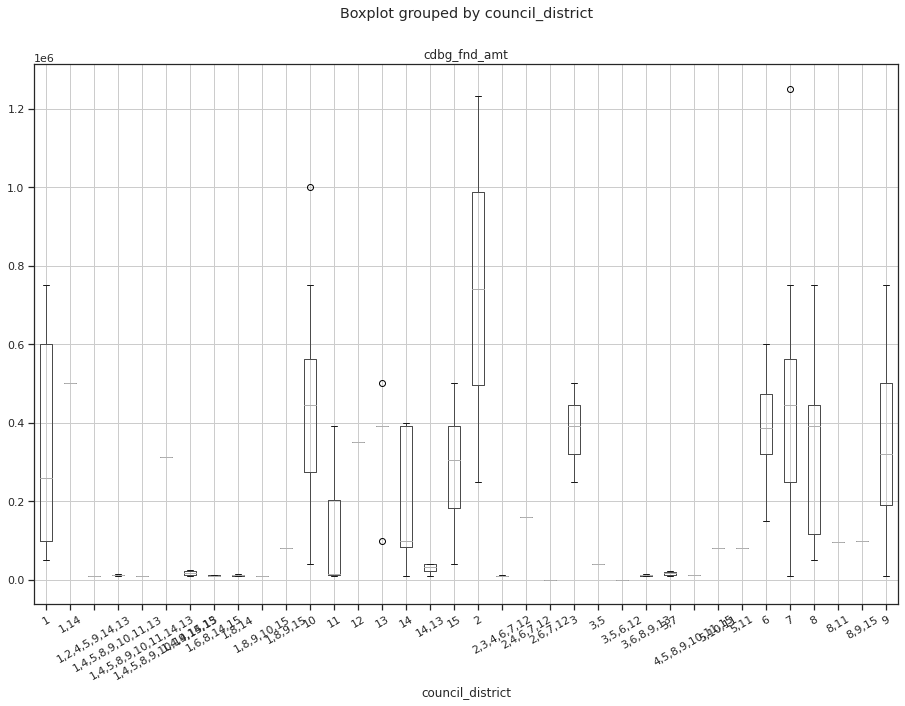

In [203]:
# Fund Amt by Council District for Grant year 44
import matplotlib
df_pep = pd.read_json("grnt41_pep.json")
df_pep.boxplot('cdbg_fnd_amt', 'council_district', rot = 30, figsize=(15,10))

In [204]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

np.random.seed(1968001)

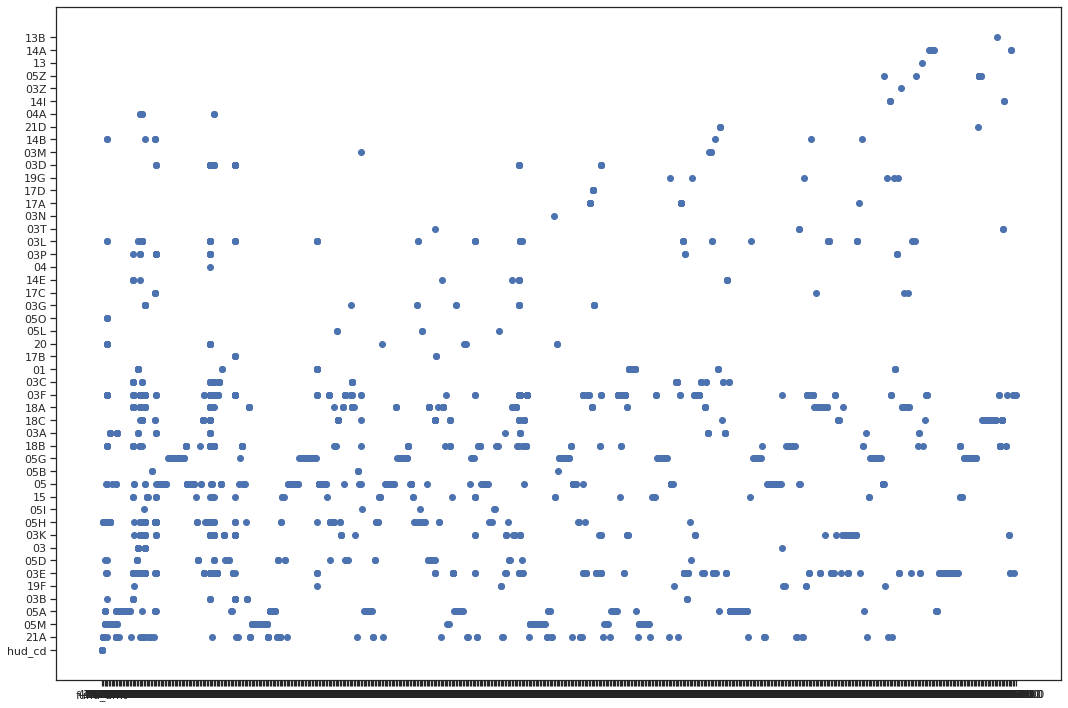

In [205]:

df_grp = pd.read_csv("df_grp.csv")
y = df_grp['hud_cd']
x = df_grp['fund_amt']

fig, ax = plt.subplots(tight_layout = True, figsize=(15,10) )
ax.scatter(x,y)


(0.0, 14000000.0)

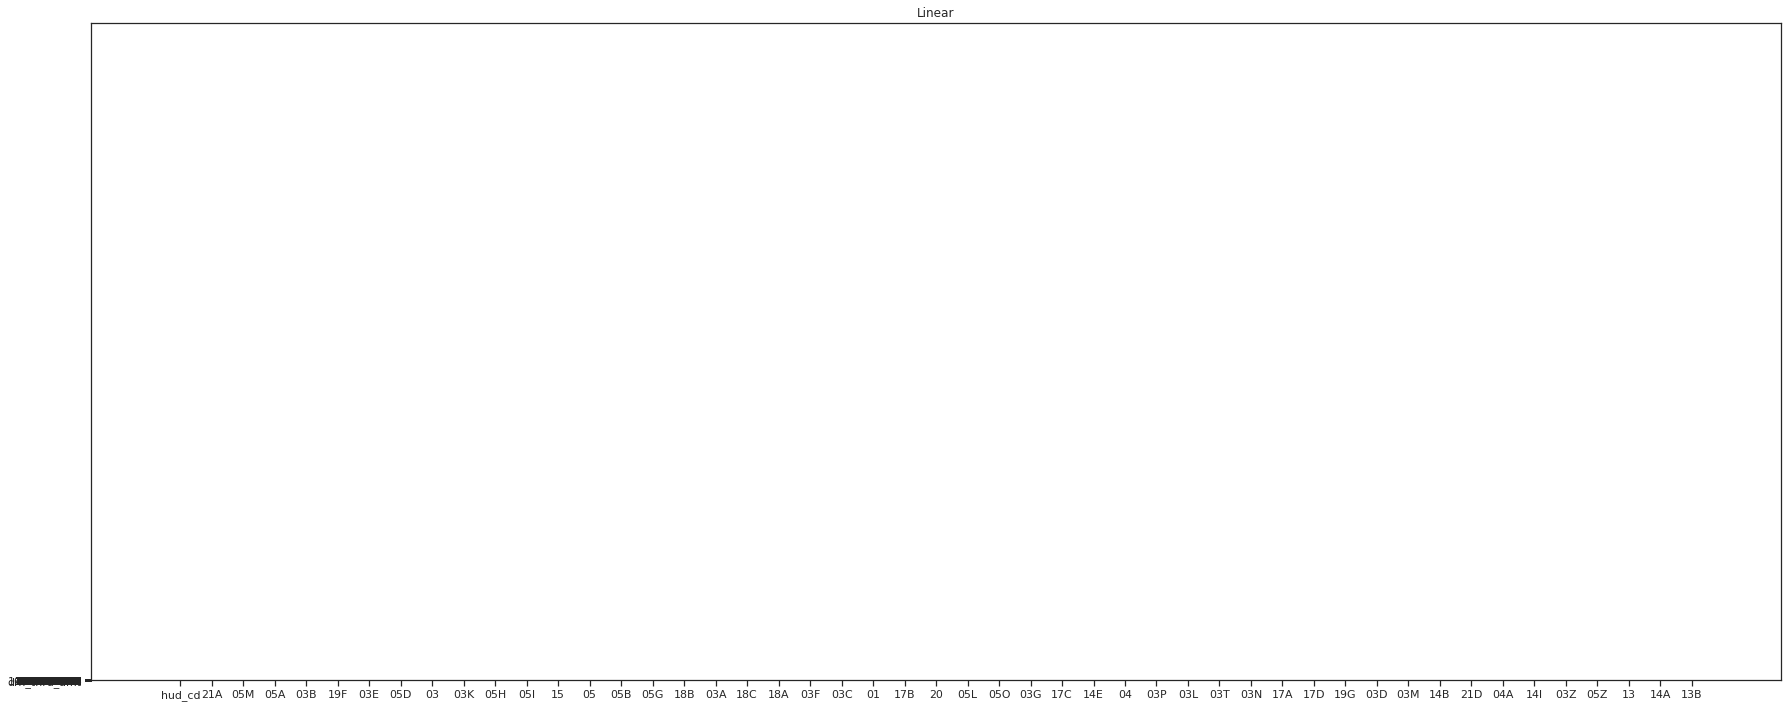

In [212]:
## Need to check for duplications over multiple years

df_grp = pd.read_csv("df_grp.csv")

fig, axs = plt.subplots(sharey = True, tight_layout = True, figsize=(25,10))
plt.yscale('linear')
plt.title('Linear')
axs.bar(df_grp['hud_cd'], df_grp['drn_thru_amt'])
plt.ylim(0, 1.4e7)

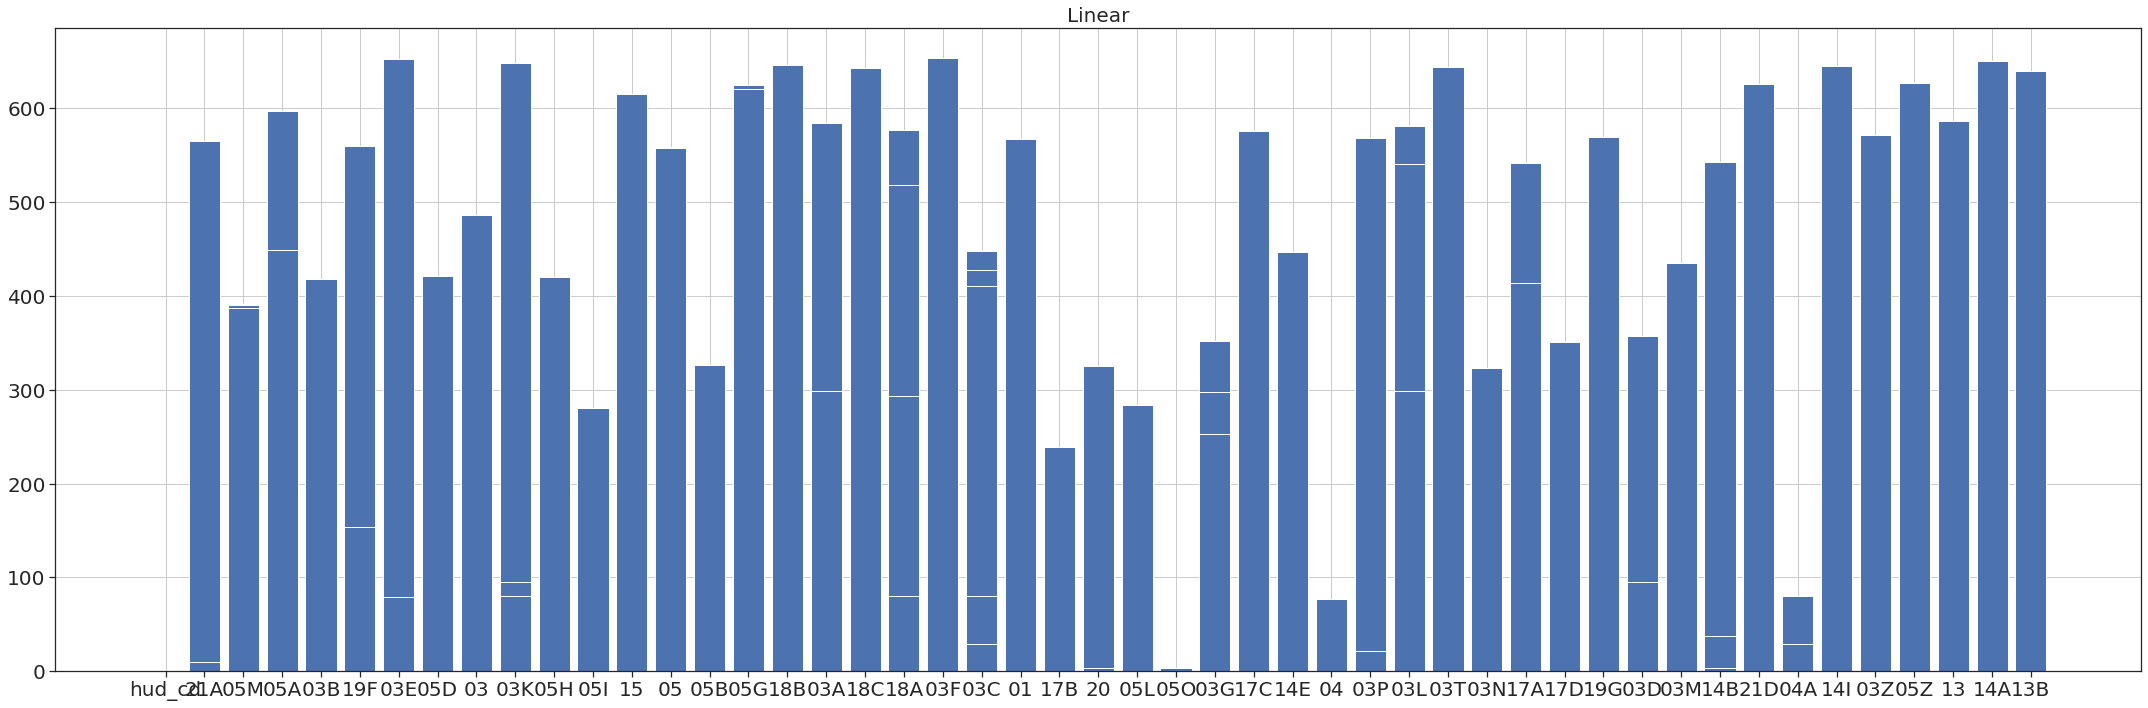

In [211]:
df_grp = pd.read_csv("df_grp.csv")
np.random.seed(1968001)

x = df_grp['hud_cd']
y = df_grp['fund_amt']

plt.subplots(sharey = True, tight_layout = True, figsize=(30,10))
plt.bar(x,y)
plt.yscale('linear')
plt.title('Linear', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()

plt.show()

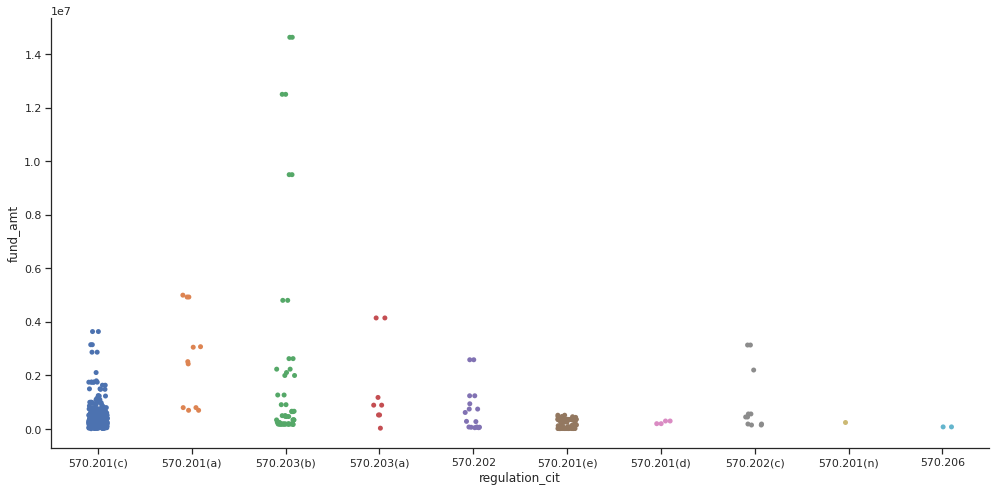

In [137]:
import seaborn as sns
import pandas.util.testing as tm

df_grp_json = pd.read_json("grnt44_grp.json")
sns.set(style =  'ticks', color_codes = True)

sns.catplot(x = "regulation_cit", y = "fund_amt", data = df_grp_json,
           height = 7, aspect = 2)


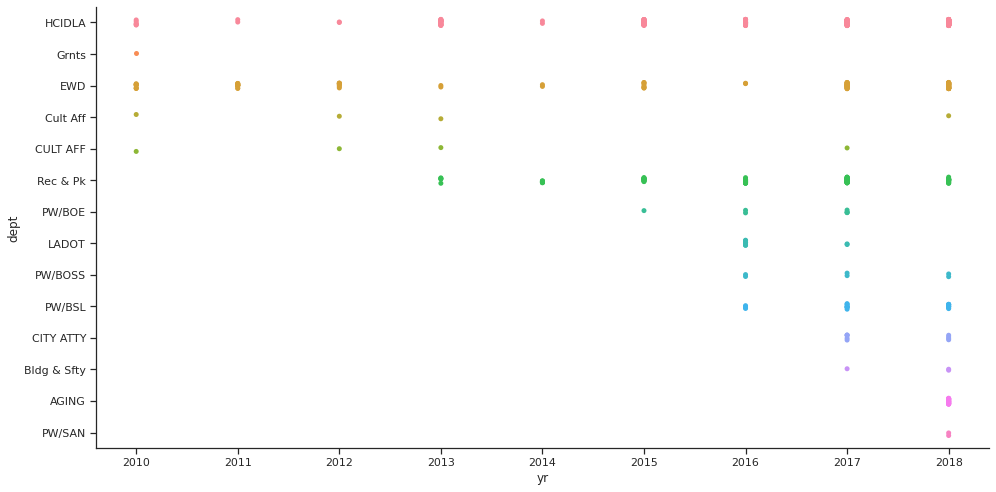

In [138]:
import seaborn as sns
import pandas.util.testing as tm

df_grp_json = pd.read_json("grnt44_grp.json")
sns.set(style =  'ticks',  color_codes = True)

sns.catplot(x = "yr", y = "dept", data = df_grp_json, height = 7, aspect = 2)


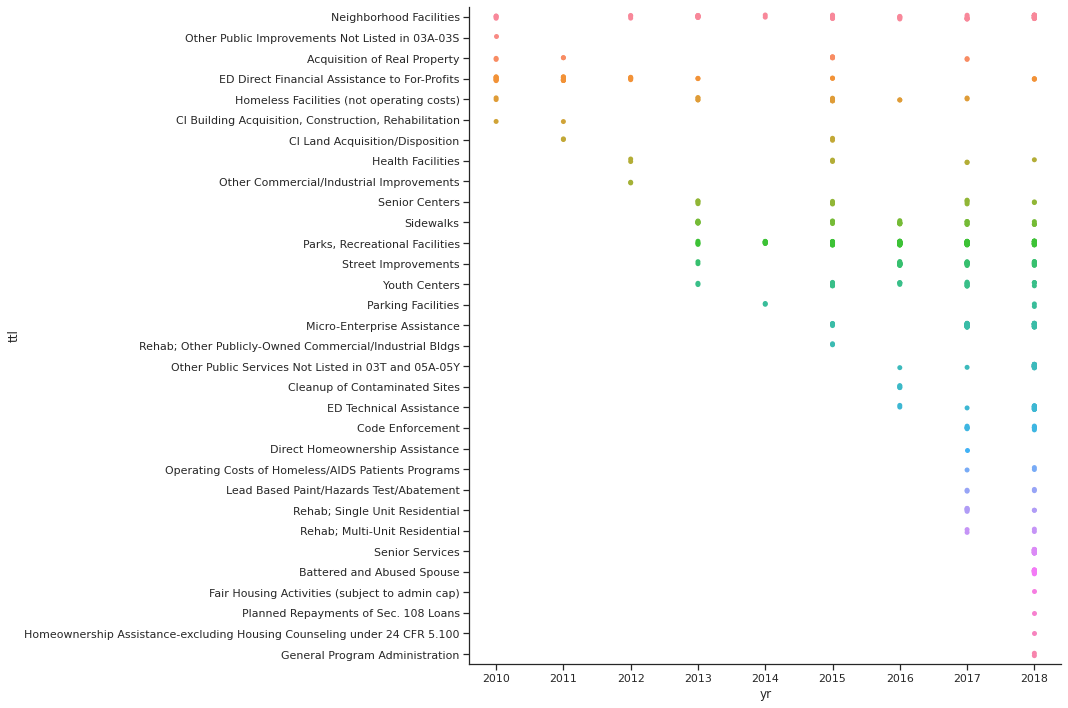

In [139]:
sns.catplot(x = "yr", y = "ttl", data = df_grp_json,
           height = 10, aspect = 1.5)


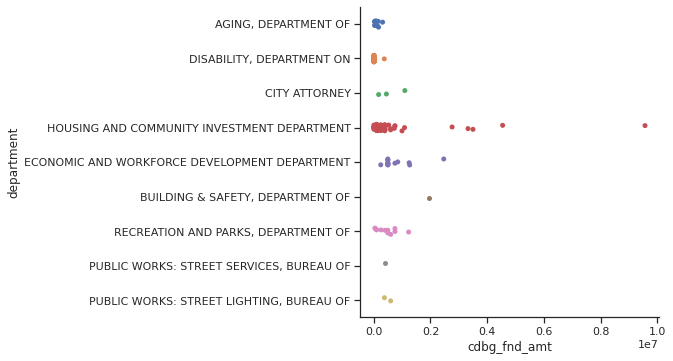

In [141]:
import seaborn as sns
import pandas.util.testing as tm

df_pep_json = pd.read_json("grnt41_pep.json")
sns.set(style =  'ticks', color_codes = True)

sns.catplot(x = "cdbg_fnd_amt", y = "department", data = df_pep_json,
           height = 5, aspect = 1)
